# Exercise: Hello world of Deep Neural Networks: MNIST digits recognzer


`#pytorch` `#deep-learning` `#classification` `#linear` `#activation` `#export` `#mnist`

> Objectives:
>
> - Design and instantiate a deep neural network model using the PyTorch framework.
> - Train the model to optically identify handwritten digits, using the MNIST dataset.
> - Verify the accuracy of the model and run inference.

## Imports


In [1]:
import torch
import torch.nn as nn  # (i.e. "neural network")
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import wandb

/Users/prasunjit/deep-learning/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load dataset




We can download the dataset from Pytorch's TorchVision library (imported above). TorchVision maintains links to a few [popular datasets](https://pytorch.org/vision/stable/datasets.html), including MNIST.


In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
train_batch_size = 64
test_batch_size = 64

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]
)

trainset = datasets.MNIST(
    "./downloads/mnist-train",
    download=True,
    train=True,
    transform=transform,
)
testset = datasets.MNIST(
    "./downloads/mnist-test",
    download=True,
    train=False,
    transform=transform,
)

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=train_batch_size, shuffle=True
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=test_batch_size, shuffle=True
)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:03<00:00, 2502362.76it/s]


Extracting ./downloads/mnist-train/MNIST/raw/train-images-idx3-ubyte.gz to ./downloads/mnist-train/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 1070576.17it/s]


Extracting ./downloads/mnist-train/MNIST/raw/train-labels-idx1-ubyte.gz to ./downloads/mnist-train/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:01<00:00, 1295219.90it/s]


Extracting ./downloads/mnist-train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./downloads/mnist-train/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 4388511.58it/s]

Extracting ./downloads/mnist-train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./downloads/mnist-train/MNIST/raw



Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:03<00:00, 2713010.68it/s]


Extracting ./downloads/mnist-test/MNIST/raw/train-images-idx3-ubyte.gz to ./downloads/mnist-test/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 1092947.05it/s]


Extracting ./downloads/mnist-test/MNIST/raw/train-labels-idx1-ubyte.gz to ./downloads/mnist-test/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:00<00:00, 7831991.62it/s]


Extracting ./downloads/mnist-test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./downloads/mnist-test/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 3839284.31it/s]

Extracting ./downloads/mnist-test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./downloads/mnist-test/MNIST/raw



In [4]:
single_image = trainloader.dataset[0]
print(single_image)
single_image[0].shape

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -

torch.Size([1, 28, 28])

#### Log the dataset to Weights and Biases


In [8]:
wandb.init(project="Hancock", name="Make dataset")

dataset_artifact = wandb.Artifact(name="MNIST", type="dataset")
dataset_artifact.add_dir("./downloads/mnist-train", "train")
dataset_artifact.add_dir("./downloads/mnist-test", "test")
wandb.log_artifact(dataset_artifact)
wandb.finish()

wandb: Currently logged in as: prasunite (prasunite-unemployed) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Adding directory to artifact (./downloads/mnist-train)... Done. 0.6s
wandb: Adding directory to artifact (./downloads/mnist-test)... Done. 0.3s
wandb: ERROR The nbformat package was not found. It is required to save notebook history.


## Designing the model


In [5]:
layer_1 = nn.Linear(784, 128)
layer_1_activation = nn.ReLU()

In [6]:
layer_2 =   nn.Linear(128, 64)
layer_2_activation = nn.ReLU()

In [7]:
layer_3 = nn.Linear(64, 10)

In [8]:
model = nn.Sequential(
    layer_1,
    layer_1_activation,
    layer_2,
    layer_2_activation,
    layer_3
)

## Calculating and Minimizing Loss


In [9]:
loss_fn = nn.CrossEntropyLoss()

## Gradient Descent Optimization


In [10]:
optimizer = optim.Adam(model.parameters(), lr=0.003)

## Training


Using mps device
Epoch: 1,	Training loss: 0.3325965912667101
Epoch: 2,	Training loss: 0.17170396657871095
Epoch: 3,	Training loss: 0.13763190469126713
Epoch: 4,	Training loss: 0.11977895789507673
Epoch: 5,	Training loss: 0.10665935626316037
Epoch: 6,	Training loss: 0.09819139013161708
Epoch: 7,	Training loss: 0.09412486271745067
Epoch: 8,	Training loss: 0.08914073478124702
Epoch: 9,	Training loss: 0.08445955622043443
Epoch: 10,	Training loss: 0.08243685332040038
Epoch: 11,	Training loss: 0.0787591741108564
Epoch: 12,	Training loss: 0.07378097866395754
Epoch: 13,	Training loss: 0.07367904726541223
Epoch: 14,	Training loss: 0.07174387903398038
Epoch: 15,	Training loss: 0.06387220199732706
Epoch: 16,	Training loss: 0.06583196362793278
Epoch: 17,	Training loss: 0.06352914058508279
Epoch: 18,	Training loss: 0.06571951462982917
Epoch: 19,	Training loss: 0.05880101631537749
Epoch: 20,	Training loss: 0.05725904726700709


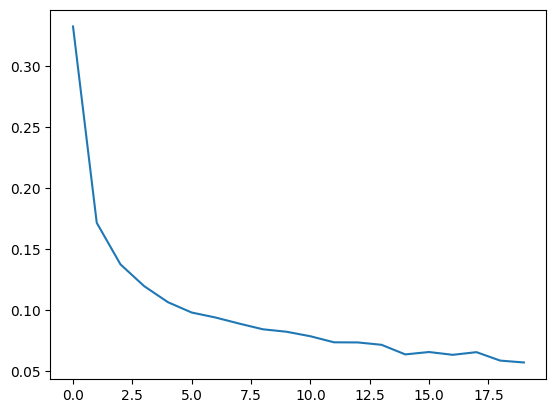

In [11]:
# Capture the losses over time for plotting
losses = []
# Number of training epochs to perform
epochs = 20

# Initialize a new run to capture this train/test cycle
# run = wandb.init(
#     project="mnist recognizer",
#     name="First MNIST recognizer Model",
#     config={
#         "dataset": "MNIST",
#         "learning_rate": 0.003,
#         "optimizer": "Adam",
#         "epochs": epochs,
#     },
# )

# Indicate that we'll use the MNIST training and test sets created above
# run.use_artifact("MNIST:latest")

# Set the device to run on: GPU, MPS, or CPU
device = torch.device(
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")
model = model.to(device)

for e in range(epochs):
    total_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784-dimensional vector
        images = images.view(images.shape[0], -1)
        # Convert input to device
        images = images.to(device)

        # Forward-propagation through the model to get predictions
        predictions = model(images)


        # Calculate the loss
        loss = loss_fn(predictions, labels.to(device))

        # Log the loss to Weights and Biases
        # wandb.log({"training_loss": loss})

        # Reset the _gradients_ for all of the model parameters
        # so that only the current batch is used to update them.
        optimizer.zero_grad()

        # Perform backpropagation
        loss.backward()

        # Update the learning rate
        optimizer.step()

        # Capture the loss for this batch
        total_loss += loss.item()

    epoch_loss = total_loss / len(trainloader)
    print(f"Epoch: {e+1},\tTraining loss: {epoch_loss}")
    losses.append(epoch_loss)

plt.plot(losses)
plt.show()

## Testing


In [12]:
with torch.no_grad():  # Temporarily turn off gradient calculation for prediction
    # images will be a batch of images from the test set
    # labels will be the corresponding labels for those images
    # We will only look at the first 10 images for brevity
    # and to avoid overwhelming the output
    for i, (images, labels) in enumerate(testloader):
        if i == 10:
            break
        # Flatten MNIST images into a 784-dimensional vector.  to flatten all the images in that batch at once.
        images = images.view(images.shape[0], -1).to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        print(f"Predicted: {predicted[0]}, Actual: {labels[0]}")

Predicted: 0, Actual: 0
Predicted: 5, Actual: 5
Predicted: 7, Actual: 7
Predicted: 5, Actual: 5
Predicted: 7, Actual: 7
Predicted: 1, Actual: 1
Predicted: 9, Actual: 9
Predicted: 7, Actual: 7
Predicted: 9, Actual: 9
Predicted: 0, Actual: 0


## Full Inference

In [14]:
# Create Weights and Biases table for storing predicted v. actual values
test_preds_table = wandb.Table(
    columns=["id", "predicted_prob", "predicted", "actual"]
)

with torch.no_grad():  # Temporarily turn off gradient calculation for prediction
    correct_count = 0
    # images will be a batch of images from the test set
    # labels will be the corresponding labels for those images
    # We will only look at the first 10 images for brevity
    # and to avoid overwhelming the output
    for i, (images, labels) in enumerate(testloader):
        images = images.view(images.shape[0], -1).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        # Use softmax function to get predicted probability from outputs
        predicted_prob = nn.functional.softmax(outputs)[
            range(outputs.shape[0]), predicted
        ]

        # compute the accuracy of the model
        correct_count += (predicted == labels.to(device)).sum().item() / labels.shape[0]

        # add test example to test_preds_table
        # test_preds_table.add_data(
        #     i, predicted_prob, predicted[0], labels[0]
        # )

    accuracy = correct_count / len(testloader)
    print(f"Accuracy: {accuracy*100}%")
    # wandb.log({"test_accuracy": accuracy})
    

/var/folders/pk/s5vzb6kd0nxghj5895vn5h540000gn/T/ipykernel_27527/1099206075.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  predicted_prob = nn.functional.softmax(outputs)[


Accuracy: 97.16361464968153%


## Exporting the model and Inference


In [ ]:
torch.save(model, "./downloads/mnist.pth")

# save to Weights nad Biases
model_artifact = wandb.Artifact(name="MNIST_classifier", type="model")
model_artifact.add_file("./downloads/mnist.pth")
run.log_artifact(model_artifact)
wandb.finish()

### Resources:


- [PyTorch: nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear)
- [List of PyTorch's Activation Layer Types](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)
- [List of PyTorch's Loss Functions](https://pytorch.org/docs/stable/nn.html#loss-functions)
  - [CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss)
